In [123]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [124]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [125]:
## Methods

### Method for Math test

#send to students /多少分/什么情况下做的
#There are 4 sets of questions which increase difficulties.
#Each set of tests records the average time taken for each question and score.
#last has no question limitation.
#1Test math ability--difficulty increase
#due to time limitations, would not have a too difficult question
#2 Difficulty and time match
#3each set has repeated for 3 times--makes result more reliable

In [126]:
## Results examining hypothesis A

### Histogram plots of results from each of the tests conducted
#Before every test results are plotted, a box plot is presented in order to find any outlier which will be removed in the histograms.

In [127]:
ans_df=pd.read_csv("ANS_results.csv")

<Axes: title={'center': 'Figure.1 Box plot of ANS test'}>

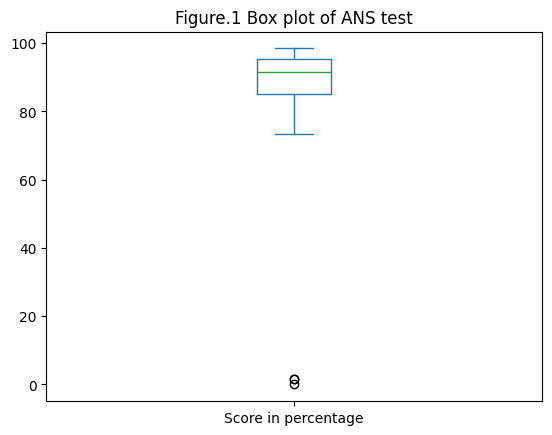

In [128]:
ans_df.plot(title="Figure.1 Box plot of ANS test", kind="box")

In [129]:
#When observing Figure.1, the score in percentage that is less than 20 is considered an outlier. 

In [130]:
#remove outlier(use box plot--manually delete the outlier)
ans_df=ans_df.loc[ans_df.iloc[:,2]>20]

<Axes: title={'center': 'Figure.2 Histogram of ANS test results'}, xlabel='Score in percentage', ylabel='Frequency'>

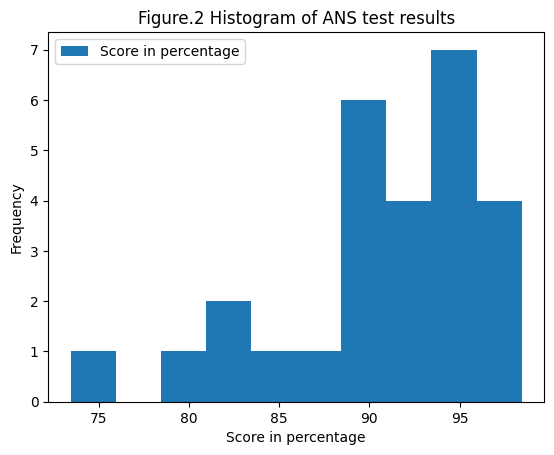

In [131]:
ans_df.plot(title="Figure.2 Histogram of ANS test results", xlabel="Score in percentage", kind="hist")

In [132]:
#Figure.2 represents the histogram of ANS ability test results.
#The results of the test are very good, most students have 90 and above for the score.

In [133]:
math_df=pd.read_csv("Math_results.csv")

<Axes: title={'center': 'Figure.3 Box plot of Math test'}>

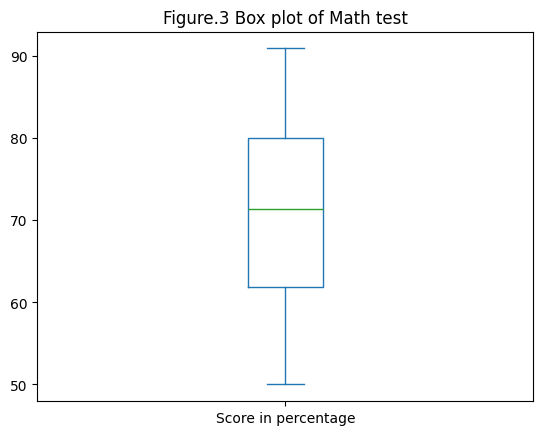

In [134]:
math_df.plot(title="Figure.3 Box plot of Math test", kind="box")

In [135]:
#According to Figure.3, there is no outlier for this Math ability test.

<Axes: title={'center': 'Figure.4 Histogram of Math ability test results'}, xlabel='Score in percentage', ylabel='Frequency'>

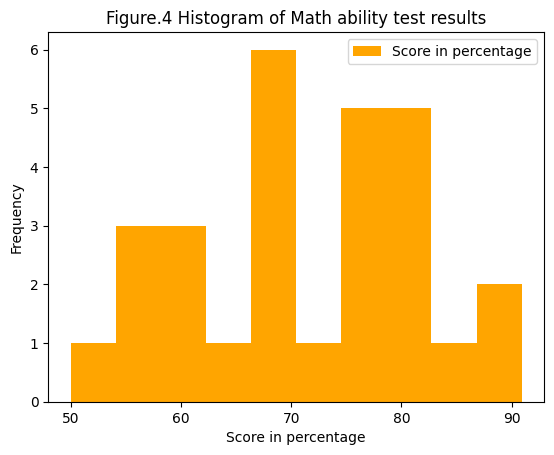

In [136]:
math_df.plot(title="Figure.4 Histogram of Math ability test results", color="orange", xlabel="Score in percentage", kind="hist")

In [137]:
#Figure.4 represents the histogram of Math ability test results.
#The frequency of getting around 70 for the score in percentage is the highest, then is around 80.

In [138]:
memory_df=pd.read_csv("Memory_results.csv")

<Axes: title={'center': 'Figure.5 Box plot of Memory test'}>

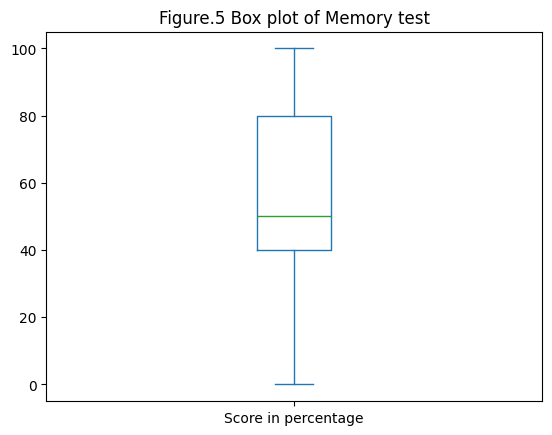

In [139]:
memory_df.plot(title="Figure.5 Box plot of Memory test", kind="box")

In [140]:
#There is no outlier for this Memory test by observing Figure.5.

In [ ]:
memory_df.plot(title="Figure.6 Histogram of Memory test results",color="green", xlabel="Score in percentage", kind="hist")

<Axes: title={'center': 'Figure.6 Histogram of Memory test results'}, xlabel='Score in percentage', ylabel='Frequency'>

In [ ]:
#Figure.6 represents the histogram of Memory test results.
#The frequency of getting 40 for the score in percentage is the highest, then is the 60.
#Few students get 0 and 100 for this test.

In [ ]:
spatial_df=pd.read_csv("Spatial_results.csv")
spatial_df=spatial_df.iloc[:,[0,1,2]]

In [ ]:
spatial_df.plot(title="Figure.7 Box plot of Spatial test", kind="box")

In [ ]:
#There is no outlier for this Spatial test.

In [ ]:
spatial_df.plot(title="Figure.8 Histogram of Spatial test results",color="red", xlabel="Score in percentage", kind="hist")

In [ ]:
#Figure.8 represents the histogram of Spatial test results.
#The frequency of getting around 90 for the score in percentage is the highest and 65 for the lowest.


In [ ]:
### Scatter plots of ANS test with the other 3 tests

In [ ]:
df_all_math=pd.merge(ans_df,math_df, on="User ID",how="inner", suffixes=['_ANS','_Math'])

In [ ]:
scatter_math=df_all_math.iloc[:,[2,4]]
scatter_math.plot(title="Figure.9 Scatter plot of ANS test and Math ability test result",x="Score in percentage_ANS",y="Score in percentage_Math",kind="scatter")


In [ ]:
#Figure.9 shows the correlation between the ANS test and the math test result. 
#The graph represents a chaotic pattern, so there is no correlation between the two tests.

In [ ]:
df_all_memory=pd.merge(ans_df,memory_df, on="User ID",how="inner", suffixes=['_ANS','_Memory'])


In [ ]:
scatter_memory=df_all_memory.iloc[:,[2,4]]
scatter_memory.plot(title="Figure.10 Scatter plot of ANS test and Memory test result",color="orange",x="Score in percentage_ANS",y="Score in percentage_Memory",kind="scatter")


In [ ]:
#Figure.10 shows the correlation between the ANS test and the memory test result. 
#The graph represents a chaotic pattern, so there is no correlation between the two tests.

In [ ]:
df_all_mathandmemory=pd.merge(math_df,memory_df,on="User ID",how="inner", suffixes=['_Math','_Memory'])

In [ ]:
scatter_mathandmemory=df_all_mathandmemory.iloc[:,[2,4]]
scatter_mathandmemory.plot(title="Figure.11 Scatter plot of Math test and Memory test result",x="Score in percentage_Math",y="Score in percentage_Memory",kind="scatter")


In [ ]:
df_all_spatial=pd.merge(ans_df,spatial_df, on="User ID",how="inner", suffixes=['_ANS','_Spatial'])

In [ ]:
scatter_spatial=df_all_spatial.iloc[:,[2,4]]
scatter_spatial.plot(title="Figure.12 Scatter plot of ANS test and Spatial test result",color="red",x="Score in percentage_ANS",y="Score in percentage_Spatial",kind="scatter")

In [ ]:
#Figure.12 shows the correlation between the ANS test and the Spatial test result. 
#The graph represents a positive straight line. Thus, there are correlation between the 2 tests.

In [ ]:
scatter_math.corr(method="spearman")
math_correlation=scatter_math.corr(method="spearman").iloc[0,1]

In [ ]:
scatter_memory.corr(method="spearman")
memory_correlation=scatter_memory.corr(method="spearman").iloc[0,1]

In [ ]:
scatter_spatial.corr(method="spearman")
spatial_correlation=scatter_spatial.corr(method="spearman").iloc[0,1]

In [ ]:
result_math= stats.ttest_ind(scatter_math.iloc[:,0],scatter_math.iloc[:,1])
rma=result_math.pvalue

In [ ]:
result_memory= stats.ttest_ind(scatter_memory.iloc[:,0],scatter_math.iloc[:,1])
rme=result_memory.pvalue

In [ ]:
result_spatial= stats.ttest_ind(scatter_spatial.iloc[:,0],scatter_math.iloc[:,1])
rs=result_spatial.pvalue

In [ ]:
Measured_correlation = [math_correlation,memory_correlation,spatial_correlation]
Significance = [rma,rme,rs]
pd.DataFrame({ 'Measured correlation value': Measured_correlation, 'Significance(p-value)': Significance},index=["ANS vs Math","ANS vs Memory","ANS vs Spatial"]  )

In [ ]:
#The table above shows no correlation between both the ANS test and the Math test. 
#In addition, there is no correlation between the ANS test and the Memory test.
#However, the measured correlation value between the ANS test and the Spatial test is near 1, so there is a positive correlation 
#The p-values for all three correlations are less than 0.01 and there will be statistical significance.
#Therefore, the results are convincing.